# House sale price prediction in King County, USA

Data contain following feature columns


id - Unique ID for each home sold

date - Date of the home sale

price - Price of each home sold

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

sqft_living - Square footage of the apartments interior living space

sqft_lot - Square footage of the land space

floors - Number of floors

waterfront - A dummy variable for whether the apartment was 

overlooking the waterfront or not

view - An index from 0 to 4 of how good the view of the property was

condition - An index from 1 to 5 on the condition of the apartment,

grade - An index from 1 to 13, where 1-3 falls short of building 
construction and design, 7 has an average level of construction and 
design, and 11-13 have a high quality level of construction and design.

sqft_above - The square footage of the interior housing space that is above ground level

sqft_basement - The square footage of the interior housing space that is below ground level

yr_built - The year the house was initially built

yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is in

lat - Lattitude

long - Longitude

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/Dixit01/100daysofML/main/TensorFlow/data/King_County_house_price.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


## Exploratory Data Analysis

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [42]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.00,4580474287.77,2876735715.75,1000102.00,2123049175.00,3904930410.00,7308900490.00,9900000190.00
price,21597.00,540296.57,367368.14,78000.00,322000.00,450000.00,645000.00,7700000.00
bedrooms,21597.00,3.37,0.93,1.00,3.00,3.00,4.00,33.00
bathrooms,21597.00,2.12,0.77,0.50,1.75,2.25,2.50,8.00
sqft_living,21597.00,2080.32,918.11,370.00,1430.00,1910.00,2550.00,13540.00
sqft_lot,21597.00,15099.41,41412.64,520.00,5040.00,7618.00,10685.00,1651359.00
floors,21597.00,1.49,0.54,1.00,1.00,1.50,2.00,3.50
waterfront,21597.00,0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,21597.00,0.23,0.77,0.00,0.00,0.00,0.00,4.00
condition,21597.00,3.41,0.65,1.00,3.00,3.00,4.00,5.00


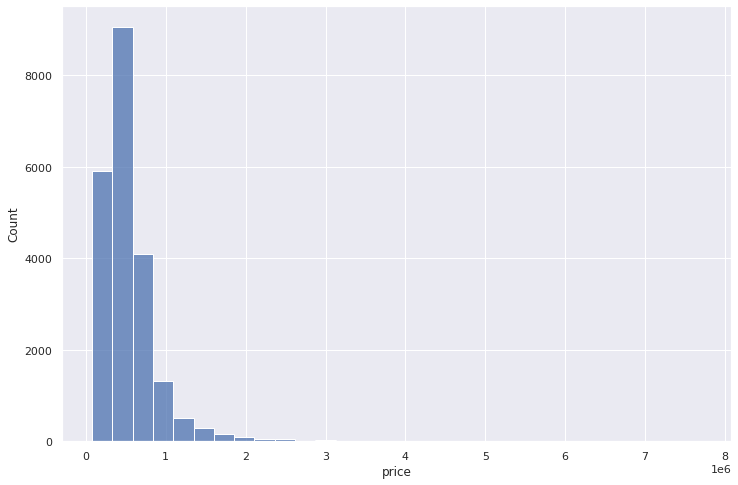

In [44]:
sns.set(rc={'figure.figsize':(12,8)})
sns.histplot(df['price'], bins=30);

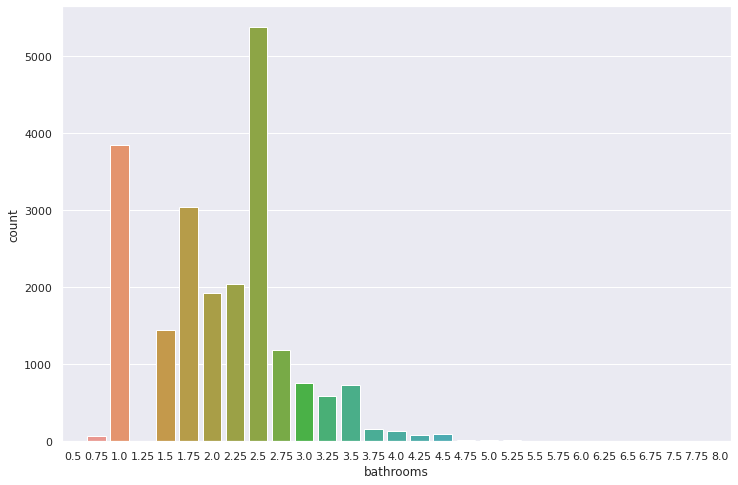

In [45]:
sns.countplot(data=df, x='bathrooms');

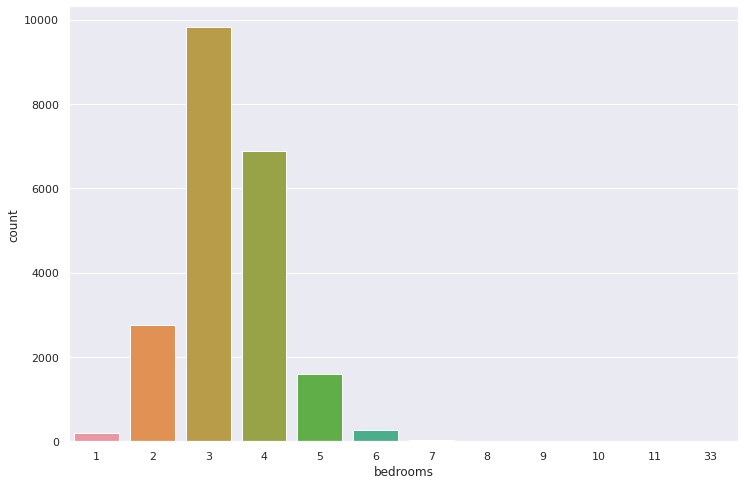

In [46]:
sns.countplot(data=df, x='bedrooms'); 
           

In [47]:
df.max()

id               9900000190
date               9/9/2014
price            7700000.00
bedrooms                 33
bathrooms              8.00
sqft_living           13540
sqft_lot            1651359
floors                 3.50
waterfront                1
view                      4
condition                 5
grade                    13
sqft_above             9410
sqft_basement          4820
yr_built               2015
yr_renovated           2015
zipcode               98199
lat                   47.78
long                -121.31
sqft_living15          6210
sqft_lot15           871200
dtype: object

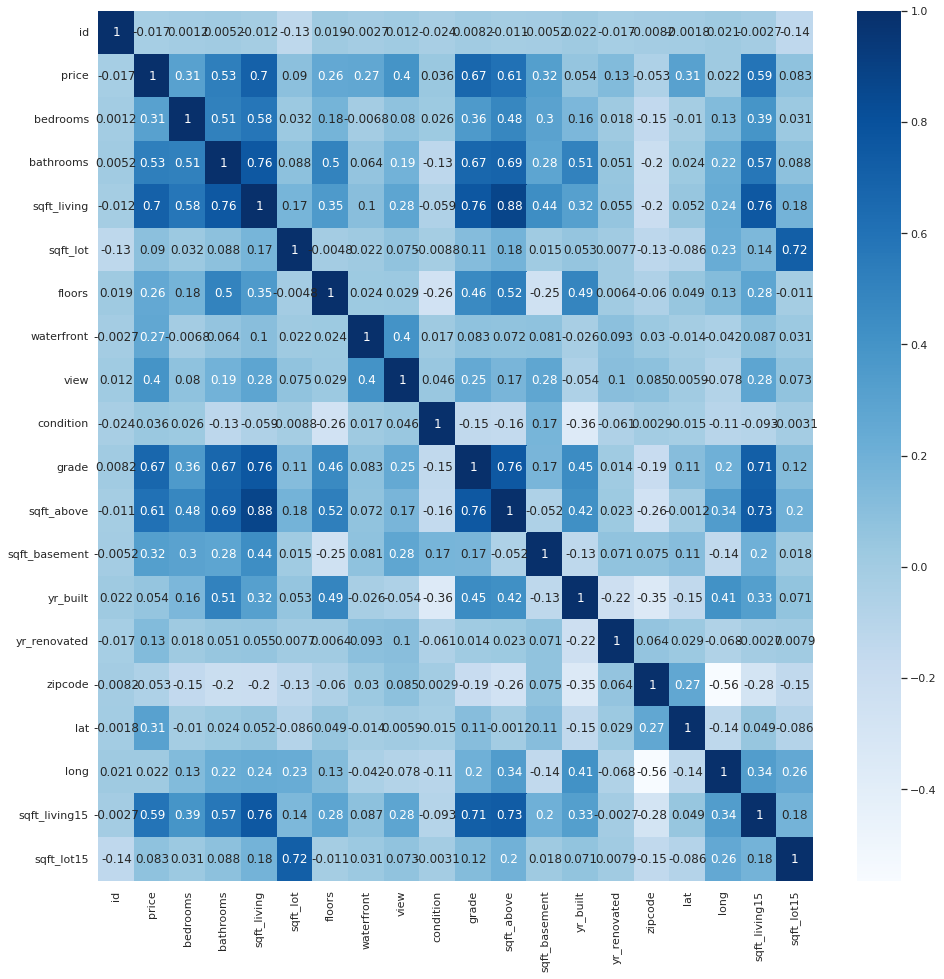

In [48]:
corrMatrix = df.corr(method='pearson')
plt.figure(figsize=(16, 16))
sns.heatmap(corrMatrix, cmap="Blues", annot=True)
plt.show()


In [49]:
# correlation > 0.75

s = corrMatrix.unstack()
so = s.where((s >= 0.75) & (s < 1)).dropna().sort_values(kind="quicksort", ascending=False)
print(so)

sqft_living    sqft_above      0.88
sqft_above     sqft_living     0.88
sqft_living    grade           0.76
grade          sqft_living     0.76
sqft_living    sqft_living15   0.76
sqft_living15  sqft_living     0.76
grade          sqft_above      0.76
sqft_above     grade           0.76
bathrooms      sqft_living     0.76
sqft_living    bathrooms       0.76
dtype: float64


In [51]:
df.corr()['price'].sort_values(ascending=False)

price            1.00
sqft_living      0.70
grade            0.67
sqft_above       0.61
sqft_living15    0.59
bathrooms        0.53
view             0.40
sqft_basement    0.32
bedrooms         0.31
lat              0.31
waterfront       0.27
floors           0.26
yr_renovated     0.13
sqft_lot         0.09
sqft_lot15       0.08
yr_built         0.05
condition        0.04
long             0.02
id              -0.02
zipcode         -0.05
Name: price, dtype: float64

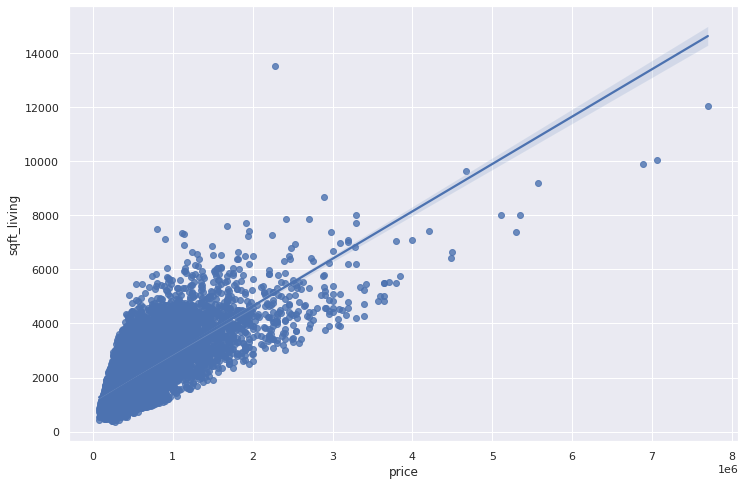

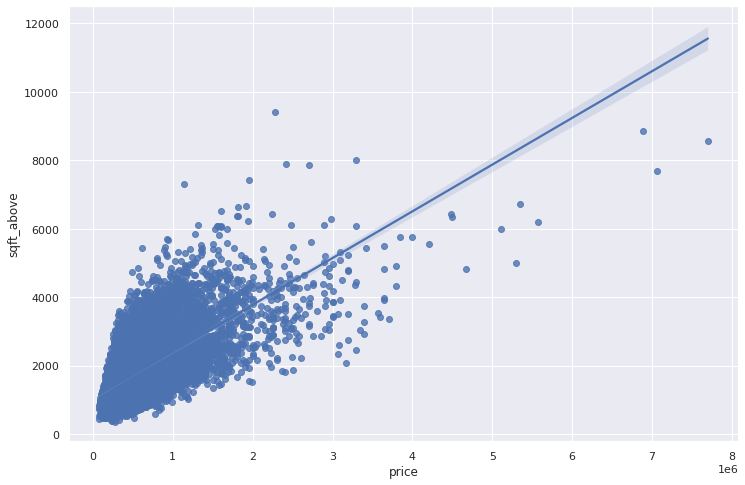

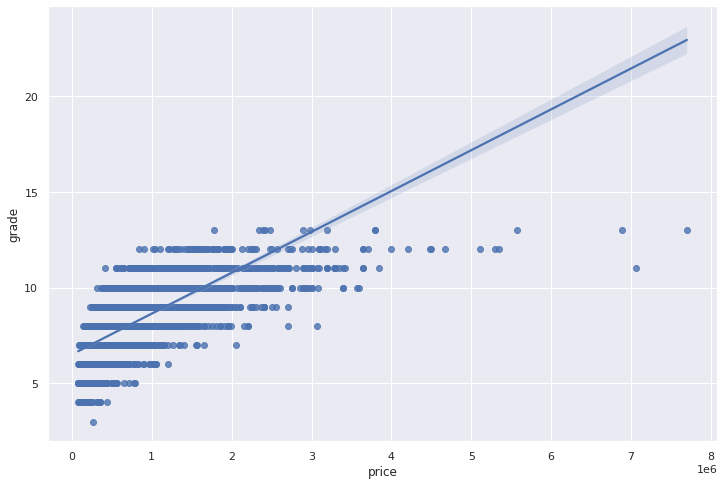

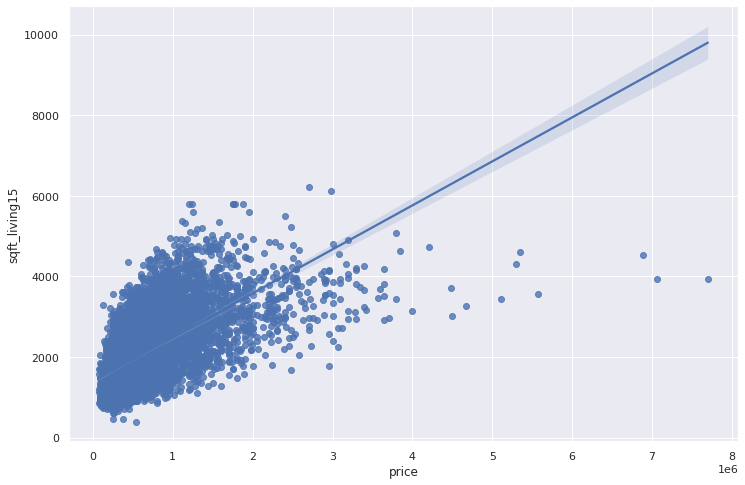

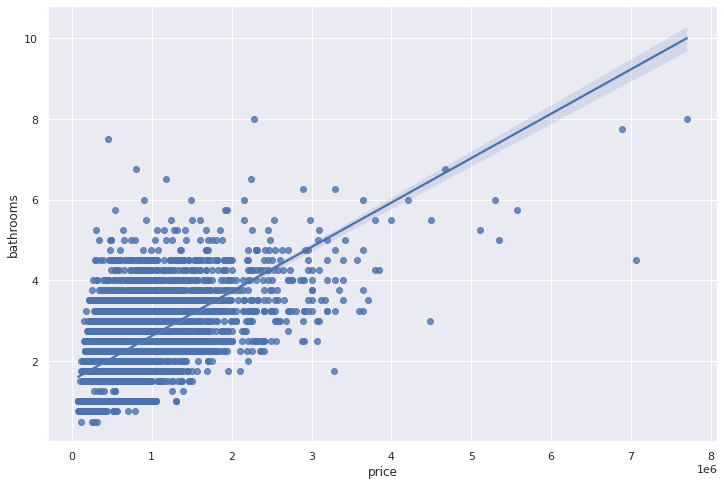

In [54]:
cols_names = ["sqft_living", "sqft_above", "grade", "sqft_living15", "bathrooms"]
for name in cols_names:
    sns.regplot(x=df["price"], y=df[name])
    plt.show()

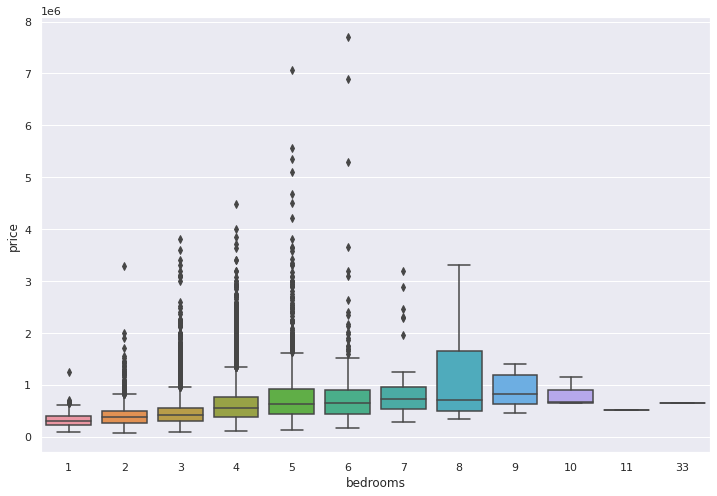

In [52]:
sns.boxplot(x='bedrooms', y='price', data=df);

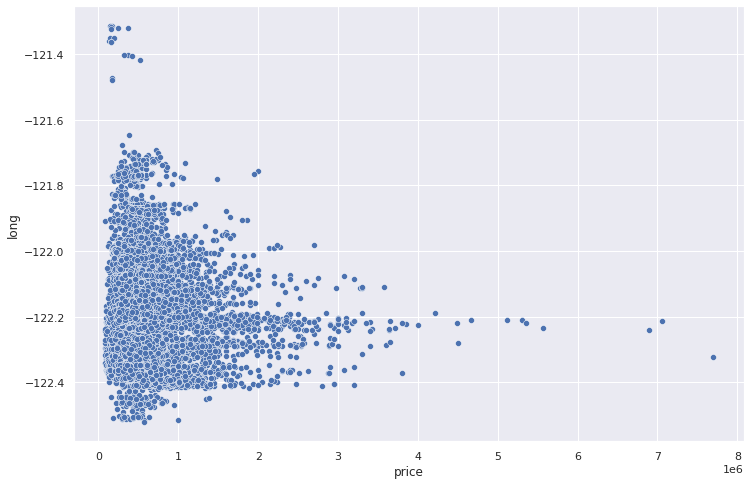

In [56]:
# Distribution of prices per latitude and longtitude
sns.scatterplot(data=df, x='price', y='long');

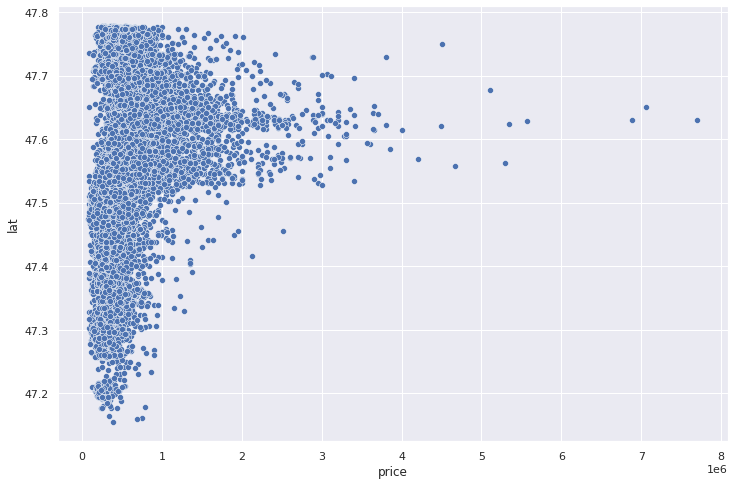

In [57]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='price', y='lat');

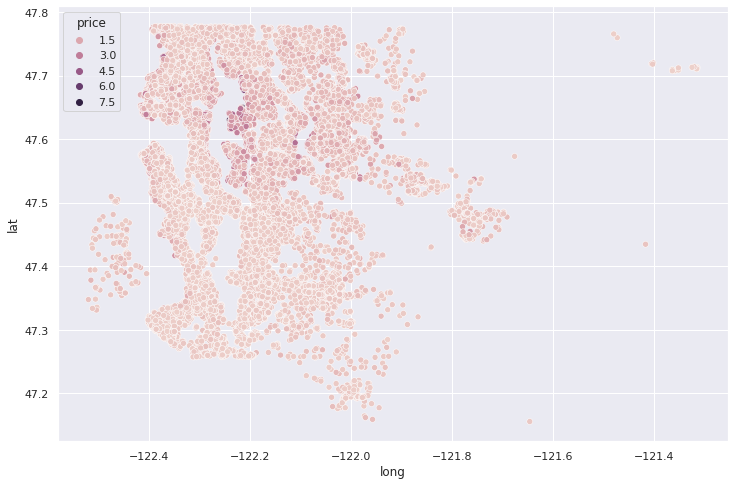

In [58]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='long', y='lat', hue='price');

In [59]:
df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.00,6,8.00,12050,27600,2.50,0,3,...,13,8570,3480,1910,1987,98102,47.63,-122.32,3940,8800
3910,9808700762,6/11/2014,7060000.00,5,4.50,10040,37325,2.00,1,2,...,11,7680,2360,1940,2001,98004,47.65,-122.21,3930,25449
9245,9208900037,9/19/2014,6890000.00,6,7.75,9890,31374,2.00,0,4,...,13,8860,1030,2001,0,98039,47.63,-122.24,4540,42730
4407,2470100110,8/4/2014,5570000.00,5,5.75,9200,35069,2.00,0,0,...,13,6200,3000,2001,0,98039,47.63,-122.23,3560,24345
1446,8907500070,4/13/2015,5350000.00,5,5.00,8000,23985,2.00,0,4,...,12,6720,1280,2009,0,98004,47.62,-122.22,4600,21750
1313,7558700030,4/13/2015,5300000.00,6,6.00,7390,24829,2.00,1,4,...,12,5000,2390,1991,0,98040,47.56,-122.21,4320,24619
1162,1247600105,10/20/2014,5110000.00,5,5.25,8010,45517,2.00,1,4,...,12,5990,2020,1999,0,98033,47.68,-122.21,3430,26788
8085,1924059029,6/17/2014,4670000.00,5,6.75,9640,13068,1.00,1,4,...,12,4820,4820,1983,2009,98040,47.56,-122.21,3270,10454
2624,7738500731,8/15/2014,4500000.00,5,5.50,6640,40014,2.00,1,4,...,12,6350,290,2004,0,98155,47.75,-122.28,3030,23408
8629,3835500195,6/18/2014,4490000.00,4,3.00,6430,27517,2.00,0,0,...,12,6430,0,2001,0,98004,47.62,-122.22,3720,14592


Most expensive house is 7.7 million dollars and prices get quickly drop off to 3 millions range.

taking top 1 percent of housing dataset as outliers.



In [60]:
len(df)*0.01


215.97

Till 216 houses indexes are top 1 percent

In [61]:
# Dataset start from 216 index (removingthe top one percent)

non_top_1_percent = df.sort_values('price', ascending=False).iloc[216:]

In [62]:
non_top_1_percent

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.00,4,3.50,4370,8510,2.00,0,1,...,10,3610,760,2003,0,98004,47.59,-122.20,2960,10347
12271,1923000260,10/15/2014,1960000.00,5,4.50,6200,23373,3.00,0,1,...,11,5050,1150,1988,0,98040,47.56,-122.22,3700,14486
9166,3124059023,2/13/2015,1960000.00,3,1.75,3330,12566,1.00,1,4,...,8,1940,1390,1960,0,98040,47.53,-122.22,3730,16560
12565,2806300065,4/22/2015,1960000.00,4,4.00,4430,31353,2.00,0,0,...,12,4430,0,1998,0,98005,47.64,-122.16,3900,35237
1150,4055701200,4/21/2015,1960000.00,4,2.75,3120,7898,1.00,1,4,...,8,1560,1560,1963,0,98034,47.72,-122.26,2630,13868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.00,2,1.00,520,22334,1.00,0,0,...,5,520,0,1951,0,98168,47.48,-122.30,1572,10570
8267,3883800011,11/5/2014,82000.00,3,1.00,860,10426,1.00,0,0,...,6,860,0,1954,0,98146,47.50,-122.34,1140,11250
16184,3028200080,3/24/2015,81000.00,2,1.00,730,9975,1.00,0,0,...,5,730,0,1943,0,98168,47.48,-122.31,860,9000
465,8658300340,5/23/2014,80000.00,1,0.75,430,5050,1.00,0,0,...,4,430,0,1912,0,98014,47.65,-121.91,1200,7500


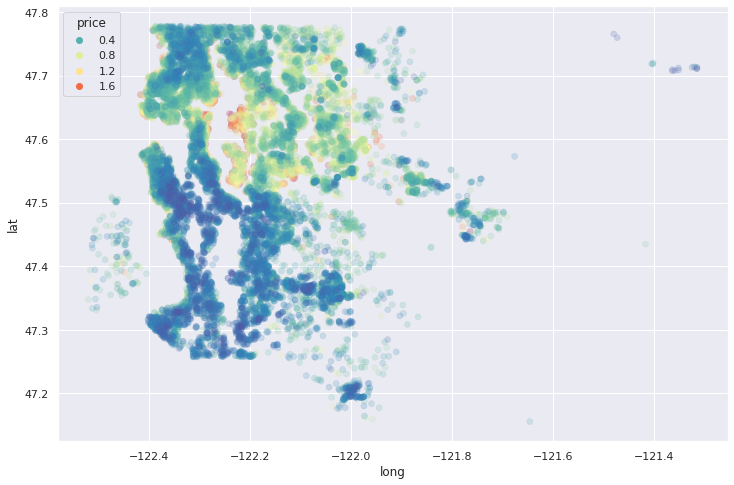

In [70]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=non_top_1_percent, x='long', y='lat', hue='price', 
                edgecolor=None, alpha=0.2, palette='Spectral_r');

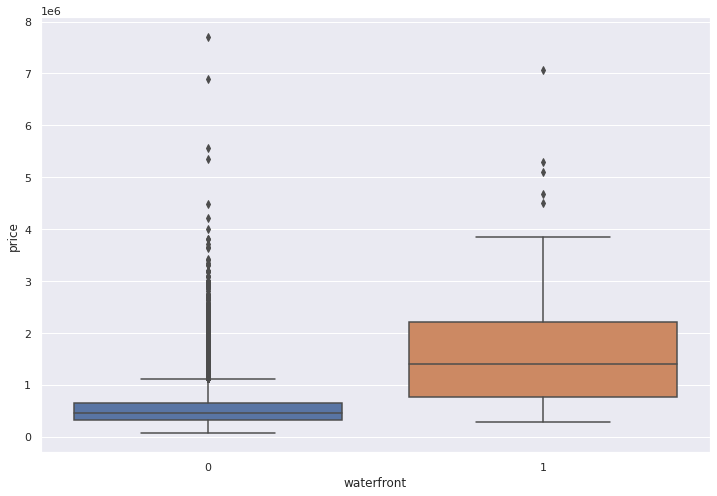

In [71]:
sns.boxplot(data=df, x='waterfront', y='price');

## Feature Engineering

In [72]:
df = df.drop('id', axis=1)

In [73]:
df['date'].dtype

dtype('O')

In [74]:
df['date'] = pd.to_datetime(df['date'])
df['date'].dtype

dtype('<M8[ns]')

In [75]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [76]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [78]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,3,...,0,1955,0,98178,47.51,-122.26,1340,5650,2014,10
1,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,3,...,400,1951,1991,98125,47.72,-122.32,1690,7639,2014,12
2,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,3,...,0,1933,0,98028,47.74,-122.23,2720,8062,2015,2
3,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,5,...,910,1965,0,98136,47.52,-122.39,1360,5000,2014,12
4,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,3,...,0,1987,0,98074,47.62,-122.05,1800,7503,2015,2


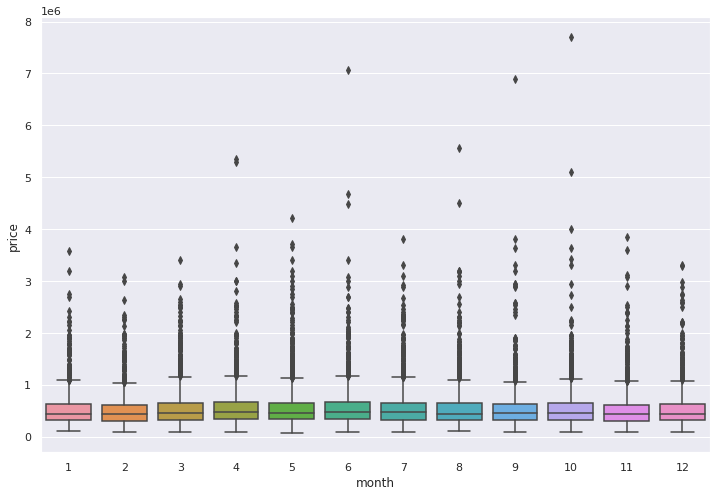

In [80]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='month', y='price');

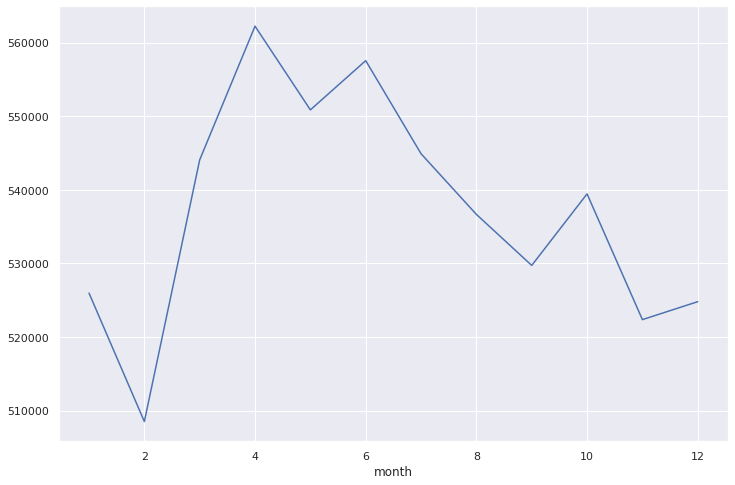

In [81]:
df.groupby('month').mean()['price'].plot();

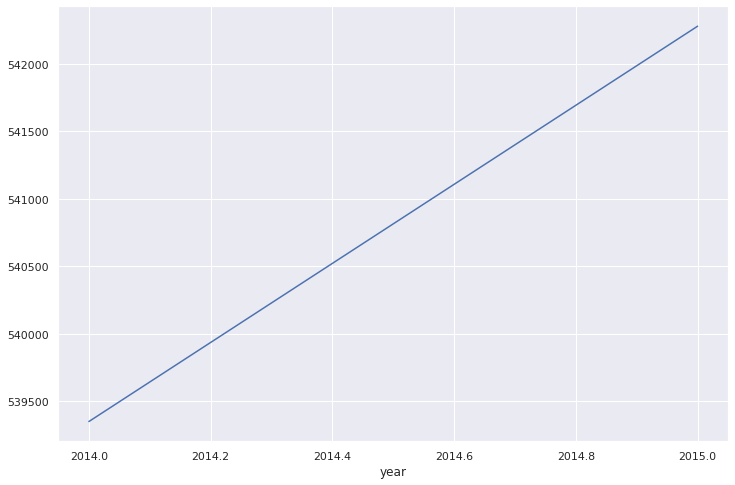

In [82]:
df.groupby('year').mean()['price'].plot();

In [83]:
# Drop the original date column
df = df.drop('date', axis=1)
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,...,0,1955,0,98178,47.51,-122.26,1340,5650,2014,10
1,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,...,400,1951,1991,98125,47.72,-122.32,1690,7639,2014,12


In [84]:
# Drop the zipcode column
df = df.drop('zipcode', axis=1)

In [85]:
# Year Renovated
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [86]:
df['yr_renovated'].apply(lambda year: 1 if year > 0 else 0)

0        0
1        1
2        0
3        0
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: yr_renovated, Length: 21597, dtype: int64

In [87]:
# Square Feet Basement

df['sqft_basement'].value_counts()

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

## Train Test Split

In [88]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Scaling

In [90]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

## Model

In [92]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [93]:
X_train.shape   #X_train.shape

(15117, 19)

In [94]:
model = Sequential()
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

### Training the Model

In [95]:
model.fit(X_train, y_train, 
          validation_data=(X_test, y_test), 
          batch_size=128,
          epochs=400)

Epoch 1/400
119/119 [==============================] - 1s 4ms/step - loss: 430237384704.0000 - val_loss: 418908274688.0000
Epoch 2/400
119/119 [==============================] - 0s 3ms/step - loss: 429304709120.0000 - val_loss: 415836176384.0000
Epoch 3/400
119/119 [==============================] - 0s 3ms/step - loss: 417808875520.0000 - val_loss: 390254919680.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 363003019264.0000 - val_loss: 299705008128.0000
Epoch 5/400
119/119 [==============================] - 0s 3ms/step - loss: 237275889664.0000 - val_loss: 157566550016.0000
Epoch 6/400
119/119 [==============================] - 1s 4ms/step - loss: 124038823936.0000 - val_loss: 98503008256.0000
Epoch 7/400
119/119 [==============================] - 1s 6ms/step - loss: 99599327232.0000 - val_loss: 95000780800.0000
Epoch 8/400
119/119 [==============================] - 1s 6ms/step - loss: 97499676672.0000 - val_loss: 93667303424.0000
Epoch 9/400
119/119 [

History of losses

Two columns loss and val_loss.

1.   loss on training data
2.   loss on validation data





In [96]:
df_losses = pd.DataFrame(model.history.history)
df_losses.head()

,loss,val_loss
0,430237384704.00,418908274688.00
1,429304709120.00,415836176384.00
2,417808875520.00,390254919680.00
3,363003019264.00,299705008128.00
4,237275889664.00,157566550016.00


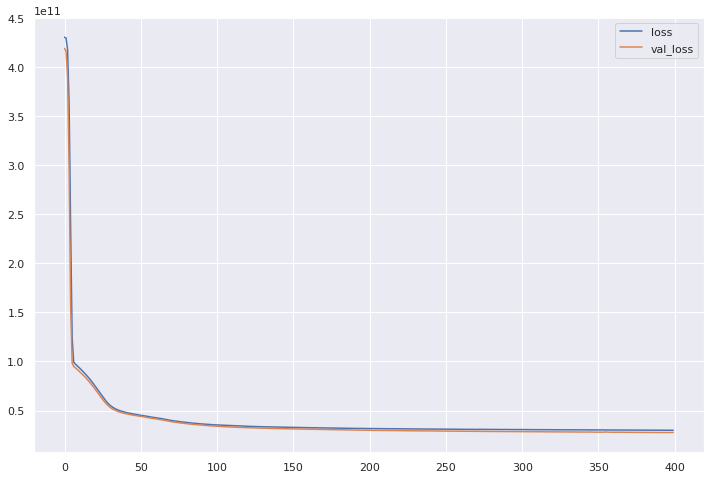

In [97]:
df_losses.plot();

### Evaluation on Test Data

In [98]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
predictions = model.predict(X_test)
mean_absolute_error(y_test, predictions)

103151.0053879726

In [99]:
mean_squared_error(y_test, predictions)

27667103216.582

In [100]:
np.sqrt(mean_squared_error(y_test, predictions))

166334.31160341512

In [102]:
#Explained Variance Score
explained_variance_score(y_test, predictions)

0.7916063120149315

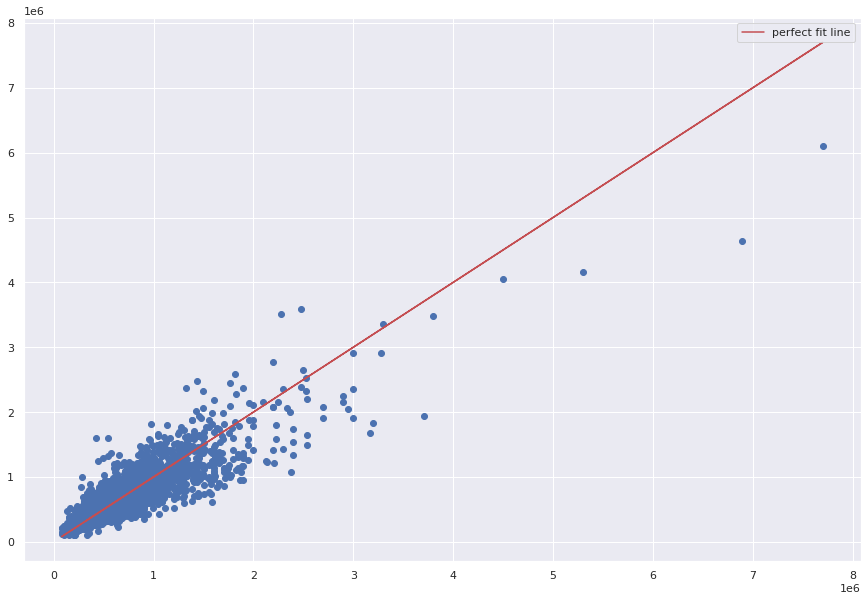

In [103]:
plt.figure(figsize=(15,10))

# Our predictions
plt.scatter(y_test, predictions);

# Perfect predictions
plt.plot(y_test, y_test, color='r', label='perfect fit line')
plt.legend();

In [104]:
predictions.shape

(6480, 1)

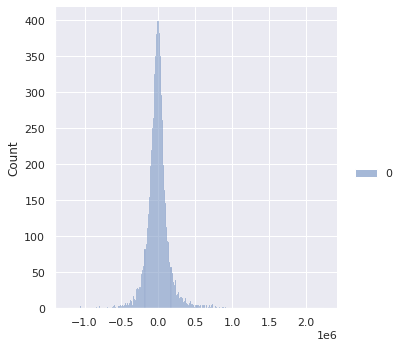

In [105]:
# Plot the error
errors = y_test.reshape(6480, 1) - predictions
sns.displot(errors);

In [106]:
# Predicting on New Data
single_house = df.drop('price',axis=1).iloc[0]
single_house.values.reshape(-1, 19)

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [107]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))
model.predict(single_house)

array([[284315.97]], dtype=float32)

In [108]:
df.iloc[0]

price           221900.00
bedrooms             3.00
bathrooms            1.00
sqft_living       1180.00
sqft_lot          5650.00
floors               1.00
waterfront           0.00
view                 0.00
condition            3.00
grade                7.00
sqft_above        1180.00
sqft_basement        0.00
yr_built          1955.00
yr_renovated         0.00
lat                 47.51
long              -122.26
sqft_living15     1340.00
sqft_lot15        5650.00
year              2014.00
month               10.00
Name: 0, dtype: float64

Model preidcts 283173 and actual price is 221900.
MSE can be reduced by dropping 1 or 2% of top value and re-train the model.